# Analyse van weersverschijnselen en verkeersongelukken in de VS

City planners, civil engineers and car manufacturers have worked tirelessly for decades to make driving a safe, comfortable and accessible option for travel. Safer roads, smarter rules and cutting edge technologies have been implement to reduce the frequency of accidents with motor vehicles, to great success as accidents on the road have dropped tremendously since the 1960s according to IIHS. Aside from individuals with poor driving skills and faulty vehicles, one of the greatest hindrances in motor safety has been the chaotic essence of mother nature. In the US, forty-two thousand people have died in 2022.
Some would argue that weather is primarily responsible for the amount of motor vehicle accidents. Weather phenomena such as hurricanes, heavy rain, icy roads and thick fog are able to severely debilitate a person’s driving skills and could pose a threat to their own safety, and that of other drivers around them. Others state that the weather is merely a small issue, and that accidents have many more causes other than weather. They argue that factors such as inexperienced drivers, unmaintained roads or sloppy city planning cause just as much, if not more accidents on the road.
We set out to research the correlation between weather and accidents in the US. To achieve this we took a look at three datasets, these being ‘US Accidents (2016 - 2023)’, ‘Traffic Violations in USA’ and ‘Historical Hourly Weather Data 2012-2017’. ‘US Accidents (2016 - 2023)’ is a detailed record of vehicle accidents in the US between 2016 and 2023, having recorded the time, place and severity of accidents, among many other variables. ‘Traffic Violations in USA’ is a dataset containing a large amount of information about traffic violations and the accidents caused by them. ‘Historical Hourly Weather Data 2012-2017’ is a record of weather across the US between the years 2012 and 2017. This dataset has recorded the hourly weather status of many large cities across the United States. With these three datasets we can analyze and compare the link between heavy weather and car accidents across the US.


## Dataset and Preprocessing

The first dataset used in this data story is the dataset US Accidents (2016-2023), found on Kaggle. This dataset contains all traffic accidents in America from Febuary 2016 to March 2023. These datapoints are all collected with the help of multiple API's that record traffic accidents and reports them. These API's send out various traffic details which are captured by various entities, such as US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. This dataset contains 7728394 records and 46 different variables. It contains variables on where the accidents took place, when they took place, if any infrastructure was nearby and the severity of the accident. <br>
For this data story only the USA will be researched, so for this dataset we removed all states and cities that were not in the USA. As for the variables, all variables that were not used such as ID, Source, Timezone and so on. To find overlap between the this database and the database mentioned in the next paragraph, only the years 2016 and 2017 were used as these are the overlapping years between the databases.

The second dataset used in this data story is Historical Hourly Weather Data 2012-2017, also found on Kaggle. It contains the data of the weather in various US states as well as some canadian and israeli cities. The records are measured by the hour and records variables such as temparature, humidity, air pressure and wind speed. There are roughly 45300 records in the database.
The only country that will be researched is the US, so all the records of the other countries have been removed from the database. The variables of the database are all in a different csv file which made it more difficult to find correlation between the databases. To overcome this obstacle all the csv files were melted and filtered on year, after the filtering the database was merged to one csv file. 

## The First Perspective
Driving through heavy rain or severe weather conditions can be disoriëntating and can lead to dangerous situations. This is why weather has a lot of influence on the frequency of accidents. Freezing temperatures and bad weather are a dangere to traffic. Cities with severe weather are more prone to traffic accidents than cities with less severe weather. To combat this issue, more precautions should be taken to prevent accidents caused by weather.

### Accidents per day
In the following graph you can see the amount of accidents per day. It is notable to see that there is a significant increase in accidents during workdays. When zooming in there is a noticable pattern with 5 days of more accidents followed by two days(weekend) of less accidents. It is also noteworthy that there is a slight increase in traffic accidents around January and October. This could be because of freezing and holidays respectively. This is worth a further investigation and this will be discussed later on.

In [47]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# datasets importen
df = pd.read_csv('../resources/dataset_weather/weather_accidents.csv')

# Filter the df to detroit
df_detroit = df[df['City'] == 'Detroit']

# Drop irralevant columns
df_detroit = df_detroit.drop(columns=['Severity', 'City'])

# Count the entries per day
accident_count = df_detroit['Date'].value_counts().sort_index()

df_accidents = df.drop(columns=['Severity', 'City'])
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_accidents['Date'] = df_accidents['Date'].dt.month_name()
total_accidents = df_accidents['Date'].value_counts()

# Merge count with df
df_detroit_count = pd.merge(df_detroit, accident_count, left_on=['Date'], right_on=[accident_count.index])

# Group dataframe by date
df_detroit_count = df_detroit_count.groupby('Date').mean()
df_detroit_count = df_detroit_count.reset_index()

# Converting the the dates to the names of the month
df_detroit_count['Date'] = pd.to_datetime(df_detroit_count['Date'])
df_detroit_count['Date'] = df_detroit_count['Date'].dt.month_name()

# Binning so the plot will show nice catagories
df_detroit_count['Temp_bins'] = pd.cut(df_detroit_count['Temperature'], [0,275,1000], labels=['Freezing', 'Not Freezing'])
df_detroit_count['Humidity_bins'] = pd.qcut(df_detroit_count['Humidity'], q=3, labels=['Low','Medium','High'])
df_detroit_count['Wind_Speed_bins'] = pd.qcut(df_detroit_count['Wind_Speed_km'], q=3, labels=['Low','Medium','High'])
df_detroit_count['count_bins'] = pd.qcut(df_detroit_count['count'], q=3, labels=['Low','Medium','High'])

fig = px.histogram(df_accidents, x='Date', category_orders=dict(Date=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]), title='Accidents per month in the US', labels={'Date':'Month', 'count' : 'Accidents'}, height=400)

fig.add_annotation(x=-0.05, y=-0.28,
                   xref="paper", yref="paper",
                   showarrow=False,
                   align='left',
                   xanchor='left', yanchor='bottom',
                   text='The sum of accidents in the US per month over the span of two years')

fig.show()

### Number of accidents and Weather scores
The two Bubble Maps are meant to put the correlation between our weather-score, and the amount of accidents in a city, into perspective. In the final version we want to make this 1 big plot instead of two smaller ones, but we ran out of time. We will also look into other variables that might have an effect on the er of accidents(like the total amount of roads in an area).

In [48]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import scale


pf = pd.read_csv('../resources/Code_website/W_PlotData.csv')
df = pd.read_csv('../resources/Code_website/A_AccidentsNewData.csv')

groottes = [(0, 5), (5, 20), (20, 50), (50, 250), (250, 1000)]
scale = 0.5

dates = ['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04', '2017-07', '2017-10']
fig = go.Figure()

# Loop?!
for date in dates:
    avg_score_per_state = pf[pf['Date'] == date].groupby('State')['score'].mean().reset_index()
    # Choropleth
    fig.add_trace(go.Choropleth(
        visible=(date == dates[3]),
        locations=avg_score_per_state['State'],
        z=avg_score_per_state['score'],
        locationmode='USA-states',
        colorscale=['#fde0ef', '#f1b6da', '#de77ae', '#c51b7d', '#8e0152'],
        colorbar=dict(
            title='Average Weather Score for each state:',
            x=1,
            y=0.3,
            len=0.6,
            thickness=15,
            
        ),
        showscale=True,
        name=f'Weather Score {date}'
    ))

# Scatter
for lim in groottes:
    scatter_traces = [] 
    for date in dates:
        df_sub = df[(df['Accidents'] >= lim[0]) & (df['Accidents'] < lim[1]) & (df['Date'] == date)]
        scatter_traces.append(go.Scattergeo(
            visible=(date == dates[3]),
            locationmode='USA-states',
            lon=df_sub['lng'],
            lat=df_sub['lat'],
            text=df_sub['City'] + ': ' + df_sub['Accidents'].astype(str) + ' Accidents',
            mode='markers',
            marker=dict(
                size=df_sub['Accidents'] * scale,
                color='#3182bd',
                line_color='rgb(40,40,40)',
                line_width=0.5,
                sizemode='area'
            ),
            name=f'{lim[0]} - {lim[1]} Accidents {date}'
        ))
    fig.add_traces(scatter_traces)

#slidy sliders
steps = []
for i, date in enumerate(dates):
    step = dict(
        method='update',
        args=[{'visible': [date == d for d in dates]}],
        label=date
    )
    steps.append(step)

sliders = [dict(
    active=3,
    pad={'t': 20, 'l': 20, 'b':20},
    steps=steps
)]

#layout ...
fig.update_layout(
    sliders=sliders,
    title='Total of accidents for each city in the USA for 2016 and 2017',
    title_x=0.5,
    title_y=0.95,
    showlegend=True,
    legend_title_text='Amount of Accidents:',
    geo=dict(scope='usa', landcolor='rgb(217, 217, 217)'),
    geo_center=dict(lon=-105, lat=38),
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(lenmode='fraction', len=0.5),
    dragmode=False,
)

#Knopperss
zoom_buttons = [
    dict(args=[{"geo.projection.scale": 1, "geo.center.lon": -105, "geo.center.lat": 38}], label='Back', method="relayout"),
    dict(args=[{"geo.projection.scale": 1.5, "geo.center.lon": -117.5, "geo.center.lat": 44}], label='Zoom Left Top', method="relayout"),
    dict(args=[{"geo.projection.scale": 1.5, "geo.center.lon": -117.5, "geo.center.lat": 31.5}], label='Zoom Left Bottom', method="relayout"),
    dict(args=[{"geo.projection.scale": 1.5, "geo.center.lon": -92.5, "geo.center.lat": 44}], label='Zoom Right Top', method="relayout"),
    dict(args=[{"geo.projection.scale": 1.5, "geo.center.lon": -92.5, "geo.center.lat": 31.5}], label='Zoom Right Bottom', method="relayout")
]

fig.update_layout(
    updatemenus=[dict(type="buttons", showactive=False, buttons=zoom_buttons, x=0.2, y=0.85)],
)

fig.show(config={'scrollZoom': False})

Dropdown(description='Date:', index=4, options=('2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-0…

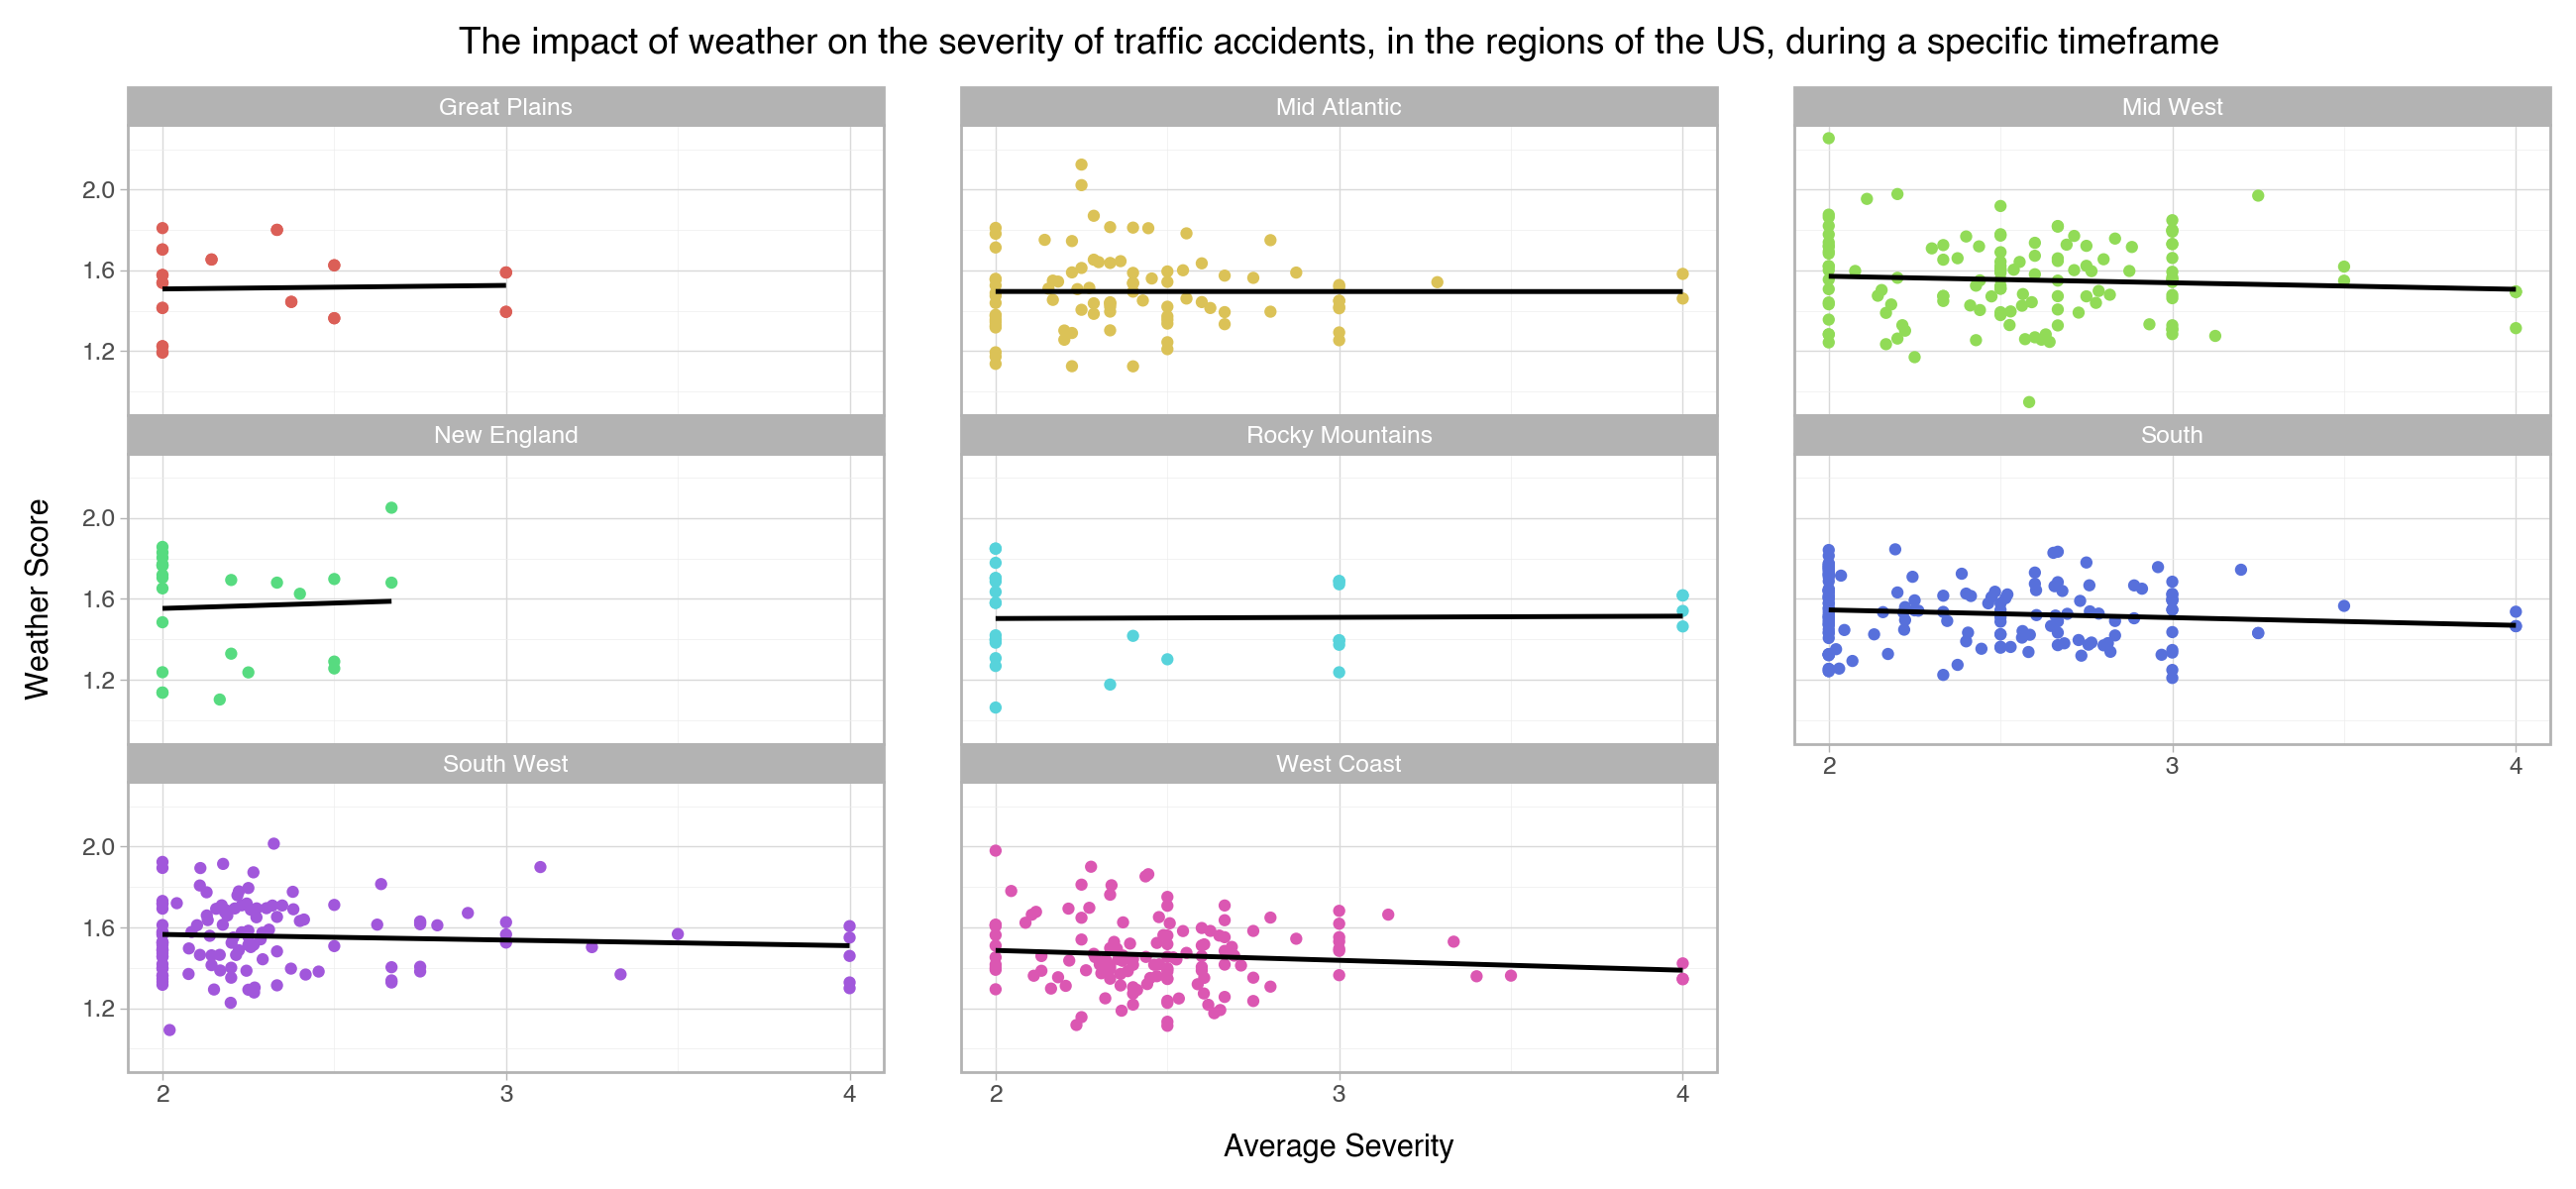

In [50]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, facet_wrap, labs, theme_light, theme, scale_x_continuous, ggtitle, geom_smooth
import ipywidgets as widgets
from ipywidgets import GridspecLayout
import plotly.graph_objects as go
from IPython.display import display, clear_output
import plotly.express as px
from plotly.subplots import make_subplots

data = pd.read_csv('../resources/Code_website/F_PlotData.csv')


data['Date'] = pd.to_datetime(data['Date'])

def update_figure(selected_date):
    filtered_data = data[data['Date'].dt.to_period('M') == selected_date]
    
    p = ggplot(filtered_data, aes(x='Average_Severity', y='Weather_Score', color='Region')) + \
        geom_point() + \
        geom_smooth(method='lm', se=False, color='black') + \
        facet_wrap('~Region', ncol=3) + \
        labs(x="Average Severity", y="Weather Score") + \
        ggtitle('The impact of weather on the severity of traffic accidents, in the regions of the US, during a specific timeframe') + \
        theme_light() + \
        theme(legend_position='none') + \
        theme(panel_spacing_y=0, panel_spacing_x=0.03) + \
        scale_x_continuous(limits=(2, 4), breaks=range(1, 5)) + \
        theme(figure_size=(13, 6)) 
    
    clear_output(wait=True)
    display(date_dropdown)
    display(p)

dates = ['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04', '2017-07', '2017-10']
date_dropdown = widgets.Dropdown(
    options=dates,
    value='2017-01',
    description='Date:'
)
display(date_dropdown)

def on_date_change(change):
    update_figure(change.new)

date_dropdown.observe(on_date_change, names='value')

update_figure('2017-01')

### Effect of freezing 

When analysing this graph, some noticable features are the amount of accidents per datapoint rather than it being spread out evenly. This is because the only datapoints in the graphed dataset are days with freezing temperatures the datapoints are only of one state so the data is lower than graph beforementioned graph with all cities combined. 

In [37]:
box_plot = px.box(df_detroit_count, x="Temp_bins", y="count",title='Average Accidents when Freezing' ,labels={'Temp_bins':'Temperare condiotion', 'count' : 'Number of Accidents'} ,height=600)
box_plot.add_annotation(x=-0.05, y=-0.14,
                   xref="paper", yref="paper",
                   showarrow=False,
                   align='left',
                   xanchor='left', yanchor='bottom',
                   text='Average number of accidents when freezing or not freezing in the city of Detroit')

box_plot.show()

## The Second Perspective
Accidents are not the cause of the weather, but rather the causes of other factors such as the city, the state and the road condition. Weather can contribute, but is a minor factor as most vehicles are built to withstand most weather events. Urban infrastructure, regional traffic laws, and maintenance of roadways play significant roles in accident occurrence. Therefore, addressing these factors is crucial for improving road safety and reducing accidents.

### Surrounding conditions
In the following graph you can see that most accidents take place with no relevant infrastructure such as traffic stops or traffic lighs nearby. It is however notable that aside from the no infrastructure, most accidents take place at junctions or traffic_signs. These are also the places that are most susceptible to human error. We can conclude from this graph that the place where the traffic accident takes place is relevant to the cause of the accidents.

In [5]:
import plotly.express as px
import pandas as pd


df = pd.read_csv('../resources/us_accidents_filtered_rows.csv')

infrastructures = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                   'Traffic_Signal', 'Turning_Loop']

# Check if all infrastructure columns are False for each row
def all_false(row):
    return all(not row[infra] for infra in infrastructures)

# Apply the function row-wise to create a boolean mask
all_false_mask = df.apply(all_false, axis=1)

# Count rows where all infrastructure columns are False
no_infrastructure_count = all_false_mask.sum()

# Count occurrences of True values for each infrastructure type
counts = [df[infra].sum() for infra in infrastructures]

# If there are rows with all False values, add a category for "No Infrastructure Near Accidents"
if no_infrastructure_count > 0:
    infrastructures.append('No Infrastructure')
    counts.append(no_infrastructure_count)

# Create lists for labels and values
labels = infrastructures
values = counts

# Calculate total number of accidents
total_accidents = sum(values)

# Calculate percentages
percentages = [count / total_accidents * 100 for count in counts]

threshold = 1.3
combined_labels = []
combined_values = []

for label, value, percent in zip(labels, values, percentages):
    if percent < threshold:
        combined_labels.append('Other')
        combined_values.append(value)
    else:
        combined_labels.append(label)
        combined_values.append(value)

fig = px.pie(names=combined_labels, values=combined_values, title='Distribution of Traffic Accidents by Infrastructure Proximity',
             hole=0.8,
             labels={'label': 'percent'},
             width=800, height=500)


fig.update_traces(textposition='outside', textinfo='label+percent')
fig.update_layout(showlegend=False)

fig.show()



### The Drivers

In [6]:
df_violations = pd.read_csv('../resources/traffic_violations_filtered.csv')
df_accidents = pd.read_csv('../resources/us_accidents.csv')

# Convert the date columns to datetime
df_accidents['date'] = pd.to_datetime(df_accidents['Start_Time'])
df_violations['date'] = pd.to_datetime(df_violations['Date Of Stop'])

# Extract year and month, and aggregate by month
df_accidents['month'] = df_accidents['date'].dt.to_period('M')
df_violations['month'] = df_violations['date'].dt.to_period('M')

accidents_per_month = df_accidents.groupby('month').size().reset_index(name='traffic accidents')
violations_per_month = df_violations.groupby('month').size().reset_index(name='traffic violations')

# Merge the aggregated data on the month
df_merged = pd.merge(accidents_per_month, violations_per_month, on='month', how='outer').fillna(0)

# Convert 'month' back to string for plotting
df_merged['month'] = df_merged['month'].astype(str)

# Melt the dataframe for Plotly Express
df_melted = df_merged.melt(id_vars='month', value_vars=['traffic accidents', 'traffic violations'], 
                           var_name='type', value_name='count')

# Create the line plot
fig = px.line(df_melted, x='month', y='count', color='type', 
              labels={'month': 'Date (Months)', 'count': 'Count', 'type': ''},
              title='Monthly Traffic Accidents and Traffic Violations')

# Show the plot
fig.show()


### Reflection

Height van de parquet aanpassen <br>
In de barplot aangeven welke dagen het heeft gevroren, ipv een aparte grafiek daarvoor. 


### References
https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents <br>
https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data/data?select=weather_description.csv